<a href="https://colab.research.google.com/github/ahmadyan/toolbox/blob/master/notebooks/Singular_Value_Decomposition_(SVD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singular Value Decomposition

Singular value decomposition is one of the most useful matrix decomposition, specially for numerical computation. Let $A$ be an $m\times n$ matrix. Then *singular value decomposition* of matrix $A$ is a factorization of the form $$A = U D V^T$$
where $D$  is an $r\times r$ diagonal with positive real values $U$ and $V^T$  are $m\times r$ and $r \times n$ orthogonal matrices (i.e. $UU^T = V^TV=I$). 
The diagonal elements of $D$, typically arranged to be non-negative and in decreasing order of magnitude, are called singular values and the matrices $U$ and $V$  are called left and right singular vectors respectively. This can be written as 
$$ A = \sum_{i=1}^r u_i \sigma_i v_i^* $$ 
where the $\sigma_i$ are the singular values and $u_i$ and $v_i$ are the $i^{th}$ columns of the matrix $U$ and $V$ respectively. Here $r$ is the number of non-zero singular values. Singular values are non-negative in decreasing orders.



![title](http://adel.ac/wp-content/uploads/2019/02/svd.png =450x170)

SVDs are generally used for finding solutions of over-determined systems. SVDs are genereally slower than standard matrix factorization algorithms like LDLT. But if used appropriately, they can be faster and more effective. They also provide the best approximate for the original matrix as well.  

### Computational Complexity
The computational complexity of computing SVD factorization depends on whether we want the full SVD (computing both $U$ and the $V$ matrix), or just computing the $V$ matrix. The columns of the matrix $V$ are the eigen-vectors of $A$ and in a lot of application, we are just interested in those columns or just the last column of $V$ (corresponding to the smallest eigen-vector). The number of flops for computing the whole factorization for an $m\times n$ matrix is $O(4m^2n + 8mn^2 + 9n^3)$, where $m$ is the number of rows (number of equations or measurements in the system) and $n$ is the number of columns (the numbers of uknown variables). However, if we only compute the $V$ matrix, the number of flops required are $4mn^2 + 8n^3$ which is **linear** in terms of $m$.  Therefore the most interesting applications of SVD would be cases where $m<<n$.

**Example: Direct Linear Transformation problem **: 
The DLT algorithm is used for camera resection. Say we have $n$ 3D point and their known 2D projection in the image and we want to compute the camera transformation matrix (a $3\times 4$ matrix, so 12 variables). The number of residuals in the linear system is $2\times n$ (for each point, we have a $x$ and $y$ measurement in the image). The solution vector in our case is the last column of $V$ (the column with the smallest eigen vector, corresponding to the eigen-vectors of $A^TA$), thus we don't need to compute the matrix $U$ at all. Therefore the complexity of this algorithm is linear in term of number of points. 



In [0]:
// P1, P2: 2-View trasnformation matrix (3x4)
// x1, x2: normalized measurement in the image

Mat4 A;
// [cross(x0,P0) X = 0]
// [cross(x1,P1) X = 0]

A.row(0) = x1[0] * P1.row(2) - x1[2] * P1.row(0);
A.row(1) = x1[1] * P1.row(2) - x1[2] * P1.row(1);
A.row(2) = x2[0] * P2.row(2) - x2[2] * P2.row(0);
A.row(3) = x2[1] * P2.row(2) - x2[2] * P2.row(1);

Eigen::JacobiSVD<Mat4> svd(A, Eigen::ComputeFullV);
// Triangulate the 3D coordinate of the point from 2-view
X = svd.matrixV().col(3); 

## Best rank-k approximation

The Eckart-Young theorem states In a least-square sense, the matrix $A_k$ is the best (2-norm) approximation of the matrix $A$ by rank $k$. Also the error is bounded. The 2-norm error is given by the first singular value that is not included in the approximation, i.e.

$$ \| A - A_k \|_2 = \sigma_{k+1}$$

We can approximate the matrix A by only including the largest singular values and singular vectors in the summation above, i.e.
$$ A_k = \sum_{i=1}^k u_i \sigma_i  v_i^* $$

We only require $k(1+m+n)$ numbers to store $A_k$. One trivial use case is in image compression. For example, we can compress an image by interpreting it as ain matrix and sending back a few eigenvalues and eigen vectors. 



datalab


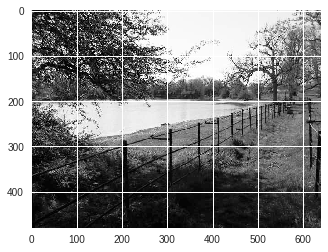

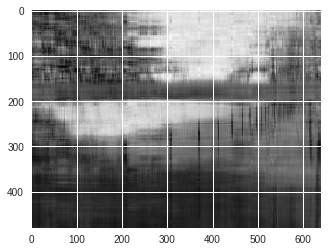

(<matplotlib.image.AxesImage at 0x7ff98100f0d0>, None)

In [0]:
# Demo of image compression using SVD

!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

import cv2
import numpy as np
import urllib
from matplotlib import pyplot as plt
from skimage import io

url = "http://s0.geograph.org.uk/photos/40/57/405725_b17937da.jpg"

img = io.imread(url)
gray = cv2.bitwise_not(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY))
plt.imshow(gray),plt.show()
U, sigma, V = np.linalg.svd(gray)
compressed = np.matrix(U[:, :10]) * np.diag(sigma[:10]) * np.matrix(V[:10, :])
plt.imshow(compressed),plt.show()